### Loading the data

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [31]:
from sklearn.datasets import fetch_california_housing
cali = fetch_california_housing()

In [32]:
type(cali)

sklearn.utils._bunch.Bunch

In [33]:
cali.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [34]:
### Desc of dataset
print(cali.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### Data cleaning

In [35]:
df = pd.DataFrame(cali.data, columns =cali.feature_names)

In [36]:
df['Price'] = cali.target

In [37]:
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [39]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [40]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

### EDA

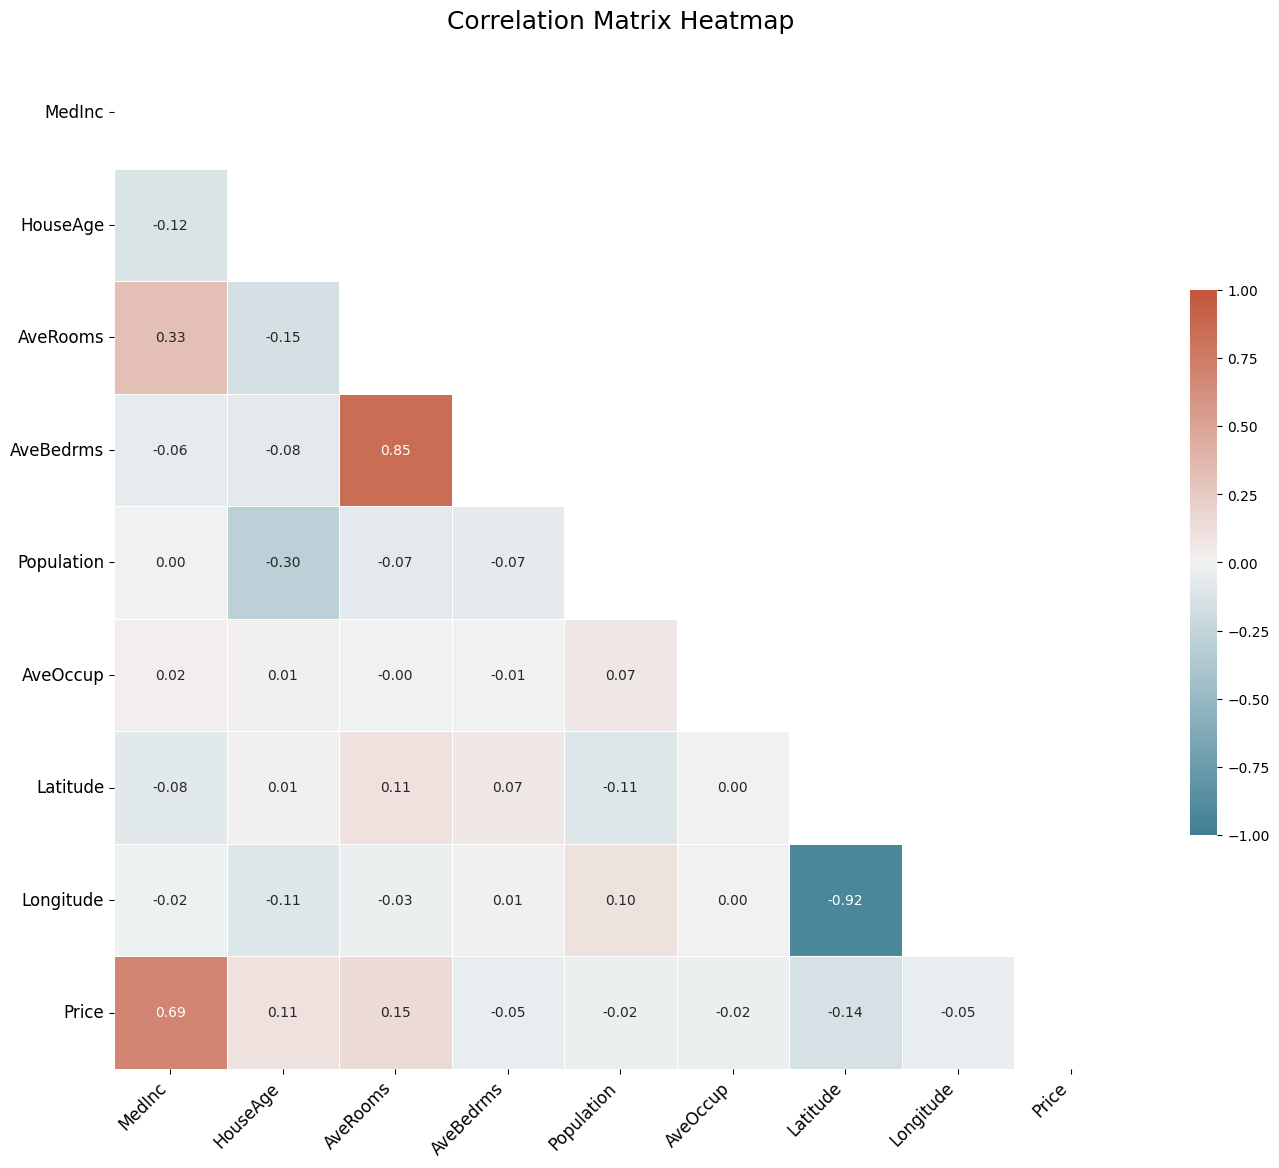

In [41]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 12))

cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,                   
    cmap=cmap,                   
    annot=True,                  
    fmt=".2f",                   
    linewidths=.5,              
    cbar_kws={"shrink": .5},     
    square=True,                 
    annot_kws={"size": 10},      
    vmax=1.0,                     
    vmin=-1.0                     
)

plt.title('Correlation Matrix Heatmap', fontsize=18, pad=20)

plt.xticks(rotation=45, ha='right', fontsize=12)

plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()

plt.show()


Short insights:
- For features with high postitive or negative correlation we will next plot the graph and make some analysis to understand them better
- Potential subjects to be removed for analysis to adress multicollinearity issues for our regression

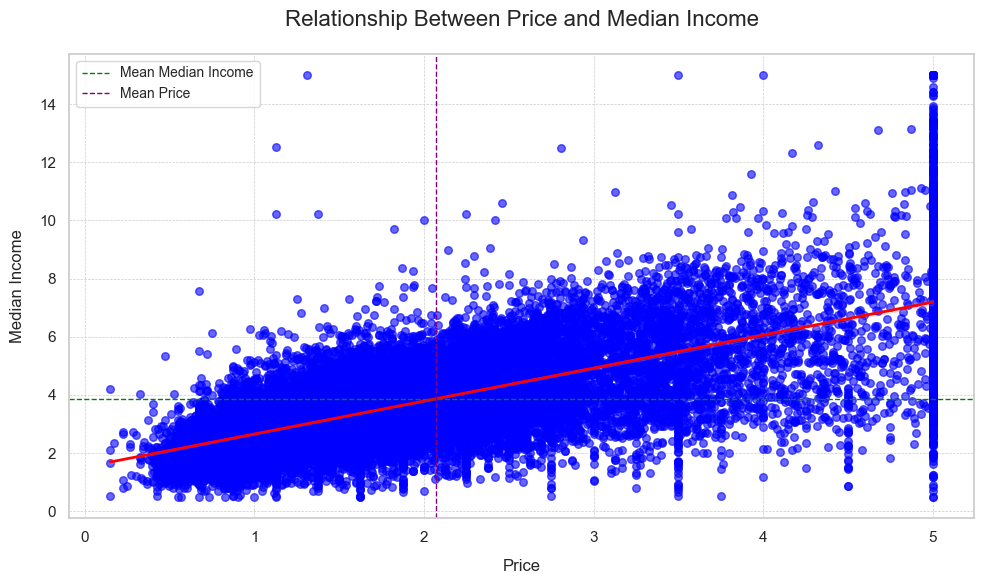

In [42]:
#Price to median income relationship

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Price',
    y='MedInc',
    data=df,
    scatter_kws={'color': 'blue', 'alpha': 0.6, 's': 30}, 
    line_kws={'color': 'red', 'linewidth': 2},                                                           
)
plt.title('Relationship Between Price and Median Income', fontsize=16, pad=20)
plt.xlabel('Price', fontsize=12, labelpad=10)
plt.ylabel('Median Income', fontsize=12, labelpad=10)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(y=df['MedInc'].mean(), color='green', linestyle='--', linewidth=1, label='Mean Median Income')
plt.axvline(x=df['Price'].mean(), color='purple', linestyle='--', linewidth=1, label='Mean Price')
plt.legend(fontsize=10)

plt.tight_layout()

plt.show()


Insights:
- As we see from the graph above positive slope of regression line confirms the relationship
- Outliers at price of 5 will be further investigated in the analysis.

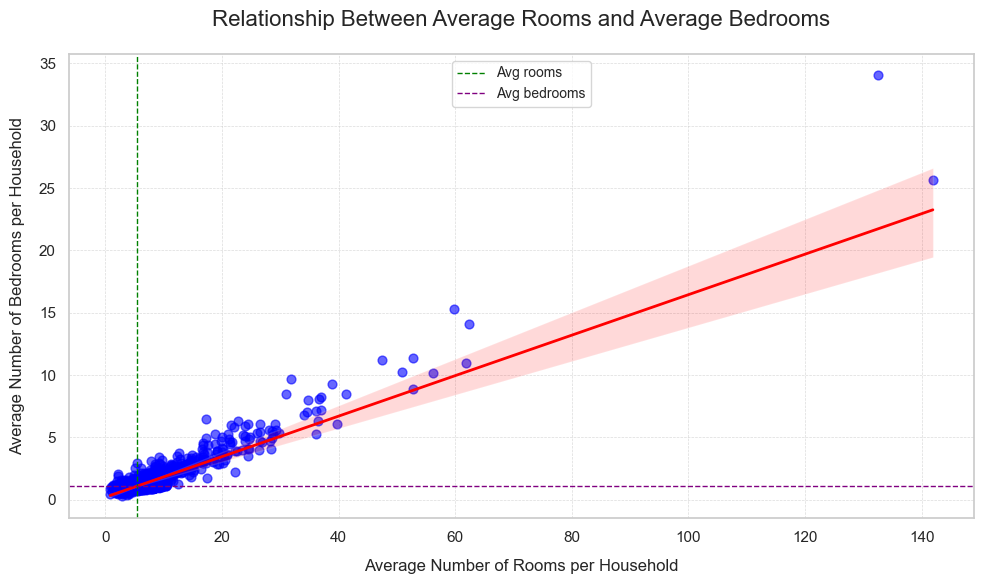

In [43]:
# Average rooms vs average bedrooms per household

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(
    x='AveRooms',
    y='AveBedrms',
    data=df,
    scatter_kws={'color': 'blue', 'alpha': 0.6, 's': 40}, 
    line_kws={'color': 'red', 'linewidth': 2},          
    ci=95                                                
)

plt.title('Relationship Between Average Rooms and Average Bedrooms', fontsize=16, pad=20)
plt.xlabel('Average Number of Rooms per Household', fontsize=12, labelpad=10)
plt.ylabel('Average Number of Bedrooms per Household', fontsize=12, labelpad=10)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.axvline(x=df['AveRooms'].mean(), color='green', linestyle='--', linewidth=1, label='Avg rooms')
plt.axhline(y=df['AveBedrms'].mean(), color='purple', linestyle='--', linewidth=1, label='Avg bedrooms')

plt.legend(fontsize=10)

plt.tight_layout()

plt.show()


Insights:
- Some outliers are identified, which will be scrutinized further in the analysis.
- As it's seen on the graph there is positive correlation between the variables avg. rooms and avg. bedrooms, which is understandable in the context of housing, the more rooms you have, there is high probability the more bedrooms are in the apartment. So the correlation is understandable.

Longitude vs latitude

- Both features (longituted and latitude) represent geo coordinates of the certain block group therefore the features are strongly correlated and should be retained in the dataset for the analysis purposes since the location plays an important role in a real estate price determination

### Determination of independent vs dependent (target) variables

In [44]:
# separatung independent and target sets
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=42)

In [47]:
# Standardizing our dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
x_train = scaler.fit_transform(x_train)

In [49]:
x_test = scaler.transform(x_test)

In [50]:
## pickling for further app.py purposes
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

### Training the model

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
regression = LinearRegression()

In [53]:
regression.fit(x_train, y_train)

LinearRegression()

In [54]:
# show coeff and interecept
print(regression.coef_)
print(regression.intercept_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]
2.0692396089424165


In [55]:
### Prediction with test data
reg_prediction = regression.predict(x_test)

In [56]:
reg_prediction

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

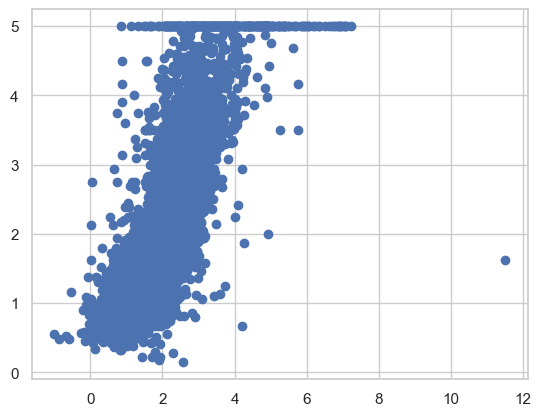

In [57]:
plt.scatter(reg_prediction, y_test)

In [58]:
#Calculatung residuals to check distribution of variances
residuals = y_test - reg_prediction

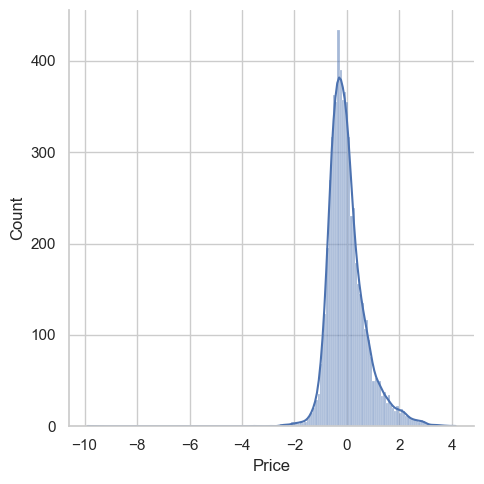

In [59]:
sns.displot(residuals, kde = True)

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, reg_prediction))
print(mean_squared_error(y_test,reg_prediction))
print(np.sqrt(mean_absolute_error(y_test, reg_prediction)))

0.5272474538305952
0.5305677824766752
0.7261180715493832


In [62]:
#Calculating baseline MAE to compare with MAE
from sklearn.metrics import mean_absolute_error

baseline_prediction = [y_test.mean()] * len(y_test)
baseline_mae = mean_absolute_error(y_test, baseline_prediction)
print("Baseline MAE:", baseline_mae)


Baseline MAE: 0.9057872985251455


Short conclusion:

Model performs well considering almost 2x baseline MAE result in comparison with MAE calculated

In [63]:
#Calculating R score

from sklearn.metrics import r2_score
score = r2_score(y_test, reg_prediction)
print(f'R score is : {score}')

R score is : 0.5957702326061665


In [64]:
adj_r2 = 1 - (1-score) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
print(f'Adjusted R score is : {adj_r2}')

Adjusted R score is : 0.5952472117200027


### Predicting new data


In [65]:
#Transform of new data
scaler.transform(cali.data[0].reshape(1,-1))

C:\Users\zyesn\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.33526315,  0.98504972,  0.63012521, -0.16586931, -0.96995366,
        -0.04555657,  1.04385626, -1.32105914]])

In [66]:
regression.predict(scaler.transform(cali.data[0].reshape(1,-1)))

C:\Users\zyesn\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])

### Pickling the model file for a deployment

In [67]:
import pickle

In [68]:
pickle.dump(regression,open('regression_model.pkl','wb'))

In [73]:
pickled_model = pickle.load(open('regression_model.pkl','rb'))

In [ ]:
# Pickled model
pickled_model.predict(scaler.transform(cali.data[0].reshape(1,-1)))

C:\Users\zyesn\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.14333441])